In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
file = '/kaggle/input/heart-failure-prediction/heart.csv'
data = pd.read_csv(file)

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


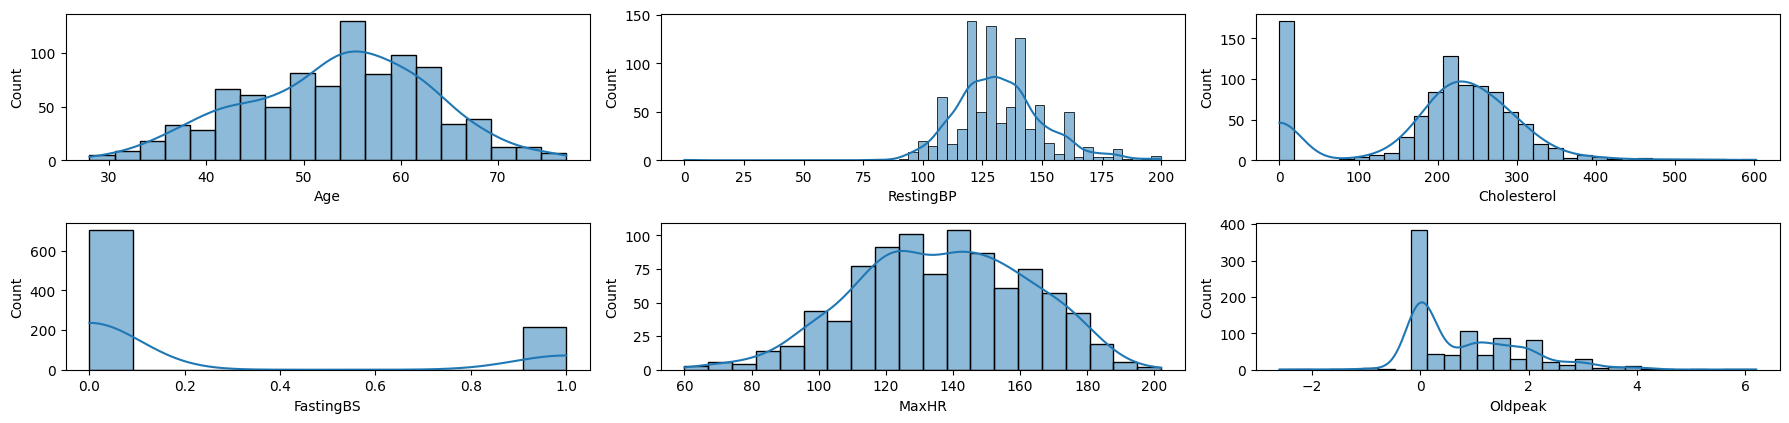

In [6]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(18,6))
# Defining a function for plotting the graphs
def plotting(var, num):
    fig = plt.subplot(3,3,num)
    sns.histplot(data[var], kde = True)
    plt.plot()

# Created a for loop to print the graphs
for i, cols in enumerate(numeric_cols):
    plotting(cols, i+1)

# Below is the method doing the same as above but by explicitly calliing function again and again   
# plotting('Age', 1)
# plotting('RestingBP', 2)
# plotting('Cholesterol', 3)
# plotting('FastingBS', 4)
# plotting('MaxHR', 5)
# plotting('Oldpeak', 6)
# # plotting('HeartDisease', 7)   # This not needed 
    
plt.tight_layout()

## Observations:
- Age, MaxHR distribution is very good
- There are some data issues in RestingBP and Cholestrol
  - RestingBP of a person can never be 0
  - Cholesrol can never be 0
- This means that we will need to deal with the data having 0 in the above two columns

In [7]:
df = data.copy()

In [8]:
# Filling Cholesterol = 0 with mean
mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = mean

In [9]:
# Filling RestingBP = 0 with mean
mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df.loc[df['RestingBP'] == 0, 'RestingBP'] = mean

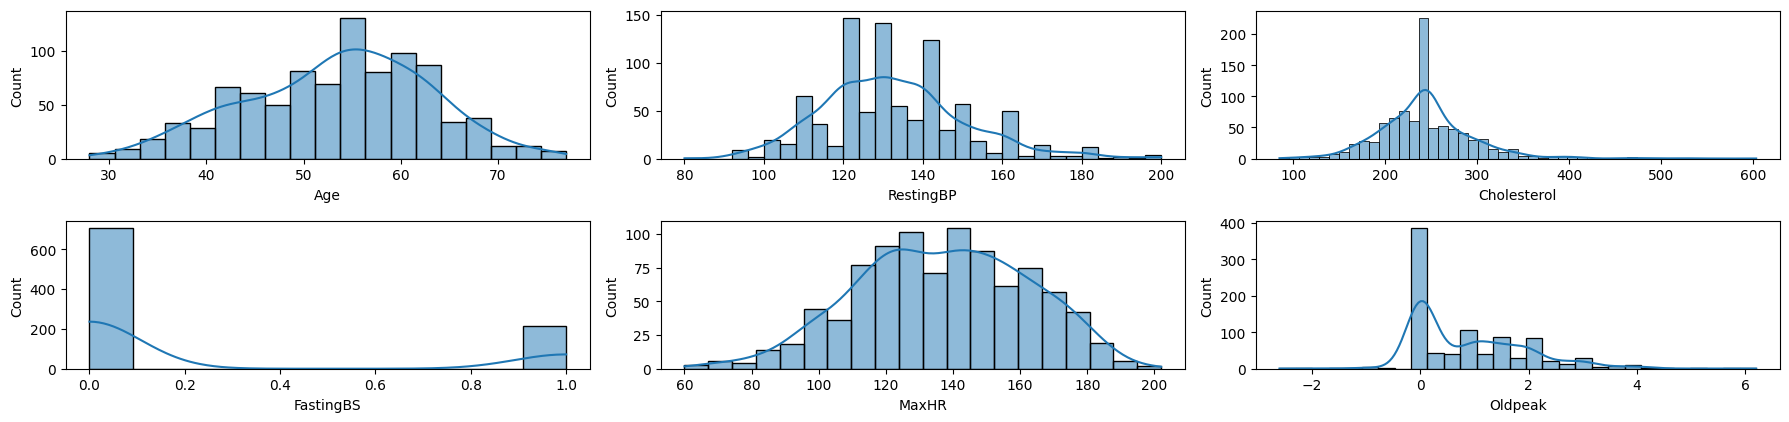

In [10]:
plt.figure(figsize=(18,6))
# Defining a function for plotting the graphs
def plotting(var, num):
    fig = plt.subplot(3,3,num)
    sns.histplot(df[var], kde = True)
    plt.plot()

# Created a for loop to print the graphs
for i, cols in enumerate(numeric_cols):
    plotting(cols, i+1)

plt.tight_layout()

## We can see that all the columns look normally distributed now. (ignore FastingBS and Oldpeak)

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
df.loc[df['FastingBS'] == 1, 'FastingBS'].count()

214

In [13]:
df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

## On exploring about why FastingBS is binary, i got to know:
    - 1 → patient’s fasting blood sugar > 120 mg/dl --> High fasting blood sugar (diabetes risk)
    - 0 → patient’s fasting blood sugar ≤ 120 mg/dl --> Normal fasting blood sugar

    In most of medical datasets, FastingBS is encoded as 0 & 1.

In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [15]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

## For categorical variables, count_plot() is a good way to analyze data

In [16]:
cat_col = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

In [17]:
# sns.barplot(df['Sex'])

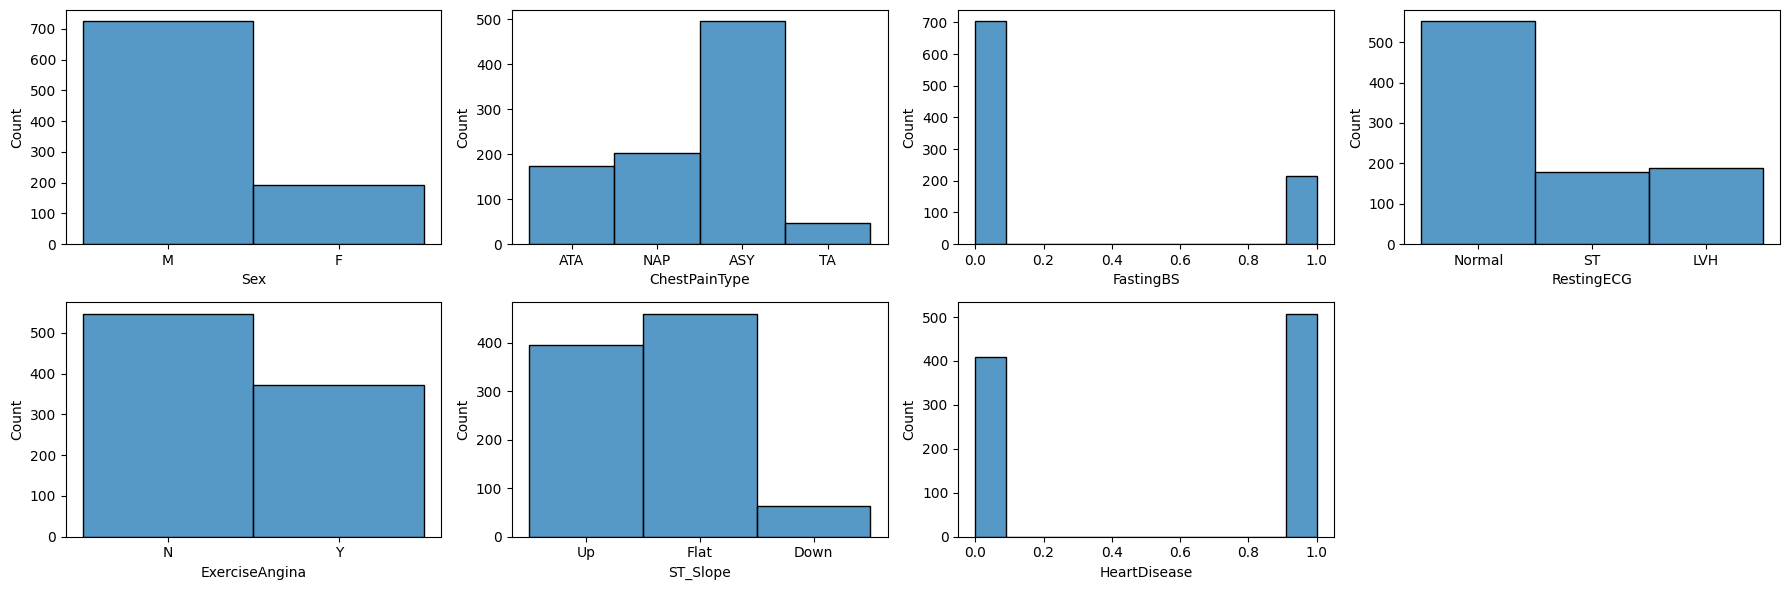

In [18]:
plt.figure(figsize = (18,6))
def cat_plot(var, num):
    fig = plt.subplot(2,4,num)
    sns.histplot(df[var])
    plt.plot()

for i, col in enumerate(cat_col):
    cat_plot(col, i+1)

plt.tight_layout()

## Encoding and Standardizing the categorical columns

In [19]:
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

In [20]:
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)

In [21]:
df = df.astype(int)

In [22]:
df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0,0,1,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0,0,0,1,0,0,1,0,0,0,1
7,54,110,208,0,142,0,0,1,1,0,0,1,0,0,0,1
8,37,140,207,0,130,1,1,1,0,0,0,1,0,1,1,0
9,48,120,284,0,120,0,0,0,1,0,0,1,0,0,0,1


# Binning

## MaxHR(Heart rate) does not cause an impact as i explored on internet.
- Categorized in two types:
  - Tachycardia (>100bpm)
  - Brady cardia (<60 bpm)

## Cholesterol can be further categorized:
|Type  | Limit|
|-------|---------|
|Normal |< 200 mg/dL|
| Borderline High | 200 mg/dL - 239mg/dL|
| High | > 240 mg/dL|

## RestingBP has also some categorization:
| Category           | Systolic            | Diastolic      |
|--------------------|---------------------|-------------|
|Normal     |           Less than 120      | Less thn 80|
|Elevated	  |          120–129           | Not Defined|
|Hypertension Stage 1   |	130–139        | 80-89|
|Hypertension Stage 2    |	 140 or higher | Above 90|
|Hypertensive Crisis*   |	Higher than 180| Above 120|

In [23]:
df['RestingBP'].describe()

count    918.000000
mean     132.540305
std       17.989941
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

### From the data obtained from internet, and min-max values of RestingBP in our df, it can be said that only Systolic vlues of BP are given, so we will use binning methof in the column based on Systolic BP

In [24]:
# Binning for Cholesterol

bins = [0,200,240,np.inf]
labels = ['normal', 'borderline_high', 'high']

df['Cholesterol_Category'] = pd.cut(df['Cholesterol'], bins = bins, labels = labels, include_lowest = True)

In [25]:
# Binning for RestingBP

bins = [0,120,130,140,180,np.inf]
labels = ['normal', 'elevated', 'hypertension_stage_1', 'hypertension_stage_2', 'hypertensive_crisis']

df['RestingBP_Category'] = pd.cut(df['RestingBP'], bins = bins, labels = labels)

In [26]:
# categoricl columns added afer binning
    # These columns also need to be encoded, so we will use get_dummies on these columns and then convert whole df to int type
new_cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

In [27]:
df = pd.get_dummies(df, columns = new_cat_cols, drop_first = True)

In [28]:
df = df.astype(int)

In [29]:
# df

In [30]:
scale_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scale = StandardScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [33]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Category_borderline_high,Cholesterol_Category_high,RestingBP_Category_elevated,RestingBP_Category_hypertension_stage_1,RestingBP_Category_hypertension_stage_2,RestingBP_Category_hypertensive_crisis
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,...,1,0,0,1,0,1,1,0,0,0
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


# Feature Engineering and Feature selection

### We performed feature engineering on our dataset 
- RestingBP and Cholesterol was converted to different columns based on type and level.
- we converted 11 initial columns to 22 using feature engineering
- now we will perform correlation, pearson correlation, chi2 test for feature selection

<Axes: >

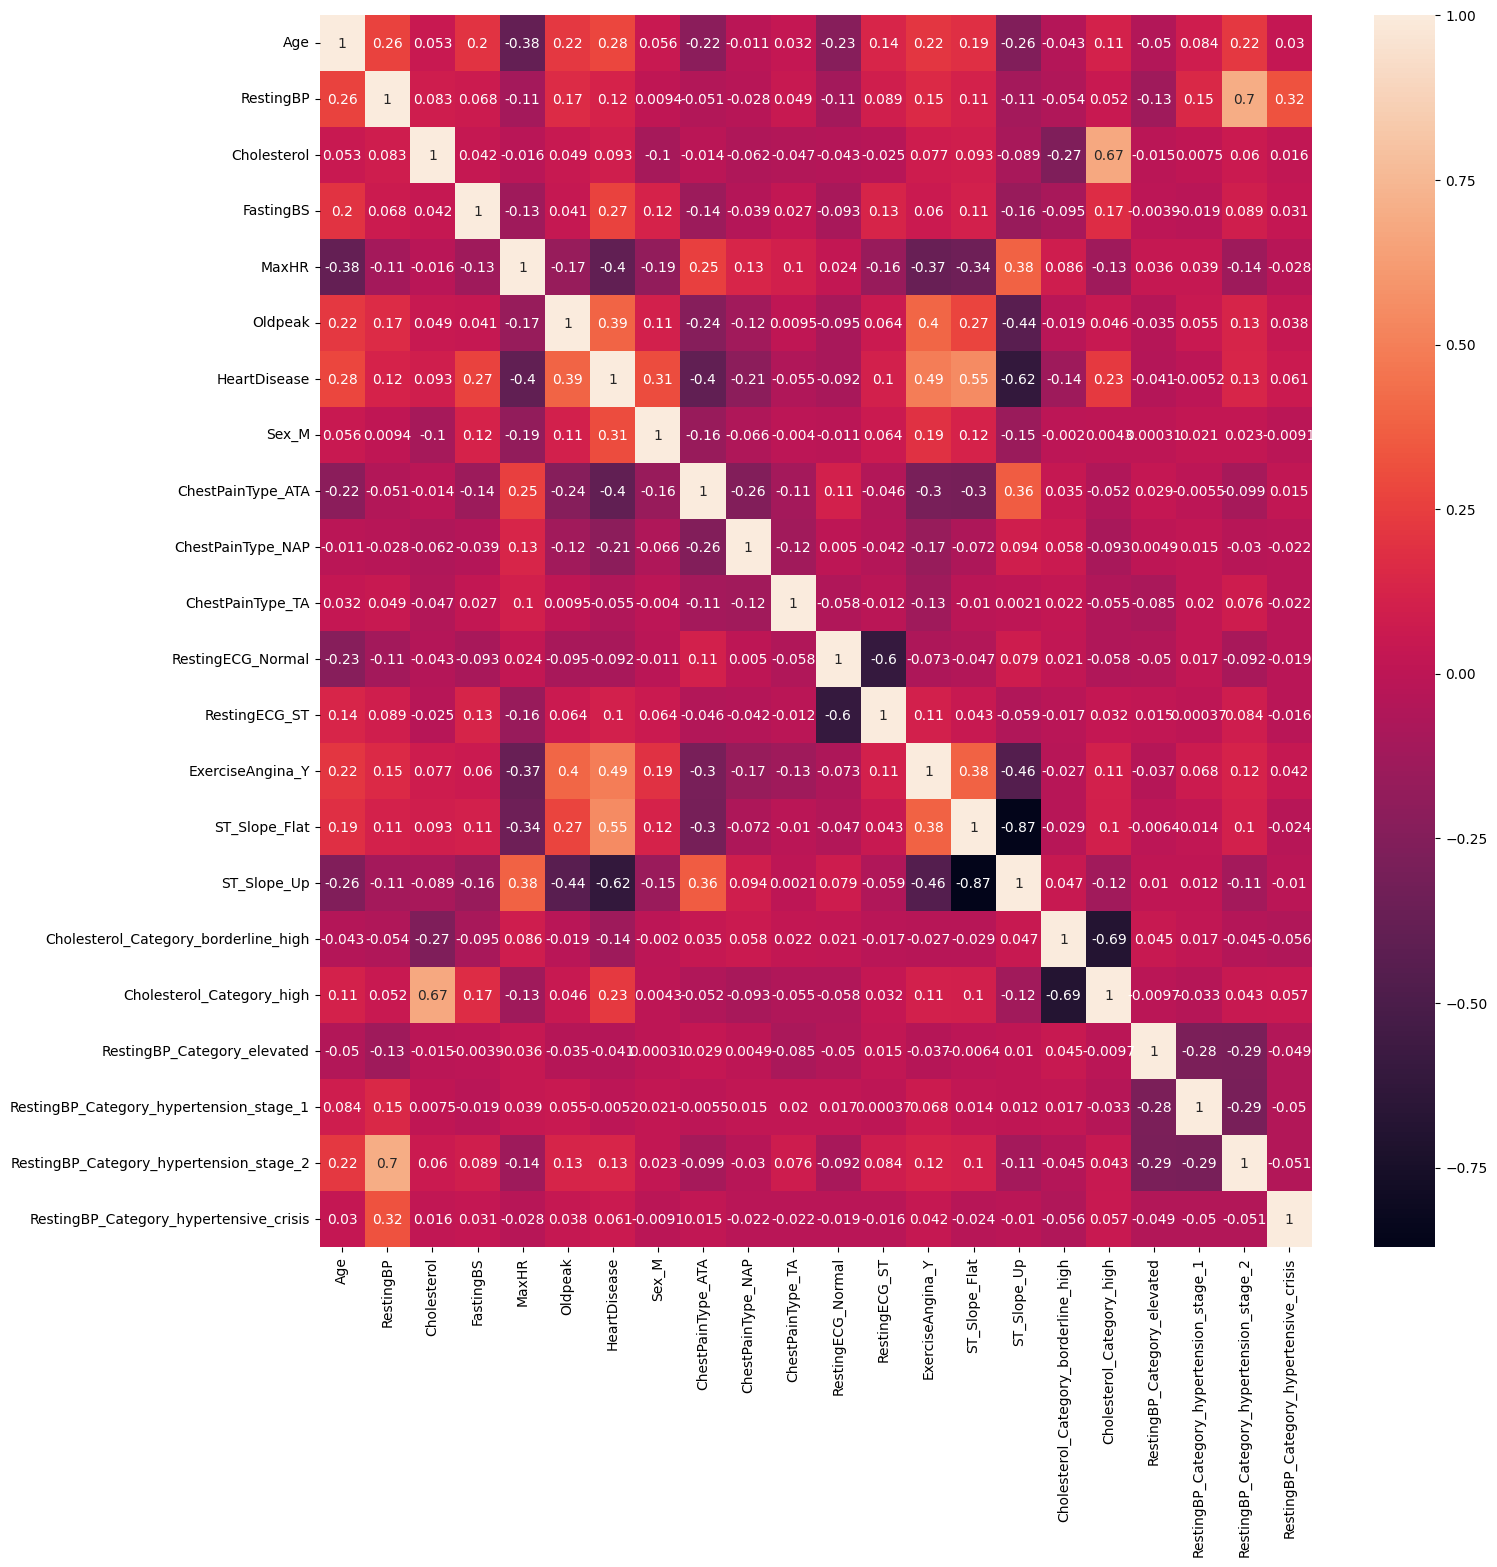

In [34]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot = True)

RestingBP_Category_hypertension_stage_1
RestingBP_Category_elevated
RestingBP_Category_hypertensive_crisis
ChestPainType_TA

# Pearson correlation

In [35]:
from scipy.stats import pearsonr

pearson_num_col = df.select_dtypes(exclude='object')

result = {col : pearsonr(df[col], df['HeartDisease'])[0] for col in pearson_num_col}
pearson_result_df = pd.DataFrame(result.items(), columns=["Feature", "Pearson_Correlation"])

pearson_result_df.sort_values(by='Pearson_Correlation', ascending=False)
# result

,Feature,Pearson_Correlation
6,HeartDisease,1.000000
14,ST_Slope_Flat,0.554134
13,ExerciseAngina_Y,0.494282
5,Oldpeak,0.392385
7,Sex_M,0.305445
0,Age,0.282039
3,FastingBS,0.267291
17,Cholesterol_Category_high,0.227634
20,RestingBP_Category_hypertension_stage_2,0.133540
1,RestingBP,0.117909


### We can see that apart from 
- RestingBP_Category_hypertension_stage_1
- RestingBP_Category_elevated
### Rest of the columns has some relation to target variable, so we will not use these two columns

# Chi2 test
- We will begin with choosing categorical columns

In [36]:
chi2_cat_col = ['FastingBS', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Cholesterol_Category_borderline_high', 'Cholesterol_Category_high',
       'RestingBP_Category_elevated',
       'RestingBP_Category_hypertension_stage_1',
       'RestingBP_Category_hypertension_stage_2',
       'RestingBP_Category_hypertensive_crisis']

In [37]:
from scipy.stats import chi2_contingency

In [38]:
chi2_cat_corr = {}
for col in chi2_cat_col:
    alpha =0.05
    contingency_table = pd.crosstab(df[col], df['HeartDisease'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    decision = 'Reject Null Hypothesis(Keep Feature)' if p<alpha else 'Failed to reject(Drop Feature)'
    chi2_cat_corr[col] = {
        'chi2' : chi2,
        'p_value' : p,
        'Decision' : decision
    }

In [39]:
df_chi2 = pd.DataFrame(chi2_cat_corr).T
df_chi2.sort_values(by=['p_value'], ascending = False)

,chi2,p_value,Decision
RestingBP_Category_hypertension_stage_1,0.006221,0.937133,Failed to reject(Drop Feature)
RestingBP_Category_elevated,1.331729,0.248498,Failed to reject(Drop Feature)
RestingBP_Category_hypertensive_crisis,2.192509,0.138683,Failed to reject(Drop Feature)
ChestPainType_TA,2.273802,0.131577,Failed to reject(Drop Feature)
RestingECG_Normal,7.327532,0.006791,Reject Null Hypothesis(Keep Feature)
RestingECG_ST,9.135266,0.002507,Reject Null Hypothesis(Keep Feature)
RestingBP_Category_hypertension_stage_2,15.739562,0.000073,Reject Null Hypothesis(Keep Feature)
Cholesterol_Category_borderline_high,16.428986,0.000051,Reject Null Hypothesis(Keep Feature)
ChestPainType_NAP,40.608711,0.0,Reject Null Hypothesis(Keep Feature)
Cholesterol_Category_high,46.646912,0.0,Reject Null Hypothesis(Keep Feature)


### using chi2 test, we fine some more features that will not be much useful
- RestingBP_Category_hypertension_stage_1
- RestingBP_Category_elevated
- RestingBP_Category_hypertensive_crisis
- ChestPainType_TA

In [40]:
df_final = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Cholesterol_Category_borderline_high', 'Cholesterol_Category_high',
       'RestingBP_Category_hypertension_stage_2',
    ]]

In [41]:
df_final

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Category_borderline_high,Cholesterol_Category_high,RestingBP_Category_hypertension_stage_2
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,1,0,0,0,1,0,1,0
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,1,0,0,1,0,0,0,1
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,1,0,0,1,0,1,0
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,1,0,1,1,0,1,0,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,1,0,0,1,0,0,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,1,0,0,1,0,0,1,0,0,0,1
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,1,0,0,1,0,1,1,0,0,0,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,1,0,1,0,0,0,0,1,0,1,0,0


# Data Cleaning, PreProcessing, Feature Engineering & Selection Done till here.

# Model Selection
- We will be performing prection using:
  - LogisticRegression
  - KNN
  - Naive Bias
  - DecisionTrees
  - SVM
- We will see accuracy score based on each of the models and preoceed further.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [44]:
X = df_final.drop(columns = 'HeartDisease')
y = df_final['HeartDisease']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'K Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Naive Bayes' : GaussianNB(),
    'SVM' : SVC()
}

In [47]:
result = []

In [48]:
for name, model in  models.items():
    y_pred = model.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    result.append({'Model Name'  : name, 'Accuracy Score' : acc, 'f1 score' : f1})

In [49]:
pd.DataFrame(result)

,Model Name,Accuracy Score,f1 score
0,Logistic Regression,0.842391,0.861244
1,K Nearest Neighbors,0.858696,0.876190
2,Decision Tree,0.793478,0.813725
3,Naive Bayes,0.853261,0.869565
4,SVM,0.864130,0.882629


In [55]:
import joblib

joblib.dump(models['SVM'], 'SVM_heart.pkl')
joblib.dump(scale, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')


['columns.pkl']